In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('Task.csv')

In [3]:
df


,w1,w2,w3,w4,w5,w6,w7,w8,w9,w10,...,w47,w48,w49,w50,w51,w52,w53,w54,w55,w56
0,fd7c28f9fd8045f2,fd7c28f9fd8045f2,fd7c28f9fd8045f2,fd7c28f9fd8045f2,fd7c28f9fd8045f2,231d91be38352d7a,306243851b716bf6,149f7dd1efe25ebc,191a909000d7123d,191a909000d7123d,...,ffedb2a5b3b4838,ffedb2a5b3b4838,fff444dcd8f9808f,ffedb2a5b3b4838,ffedb2a5b3b4838,ffedb2a5b3b4838,ffedb2a5b3b4838,fffe76c3a948cdfb,fffe76c3a948cdfb,fffe76c3a948cdfb
1,54910d2b363221e1,520443b0b8128202,a4bce0d054266d68,a4bce0d054266d68,c0bb01dbe2b2de0f,53010d4139ed029f,d1afc6d7c4661d7e,9ab44ee389767d59,91e804eb002a580d,5109246885c54360,...,ffe3d17a83edd05a,ffe3d17a83edd05a,ffedb2a5b3b4838,ffde16048235a32f,ffde16048235a32f,ffe7939306264854,ffe7939306264854,fff444dcd8f9808f,fff444dcd8f9808f,ffe7939306264854
2,520443b0b8128202,a4bce0d054266d68,7b042fcc54a45882,d98da6eaa4bb452f,7b042fcc54a45882,a4bce0d054266d68,3792a1c9395e3e2a,839d5042ee4d8988,a4bce0d054266d68,e254fb2201bf1419,...,ffde16048235a32f,ffde16048235a32f,ffde16048235a32f,ffd99d6c632283a9,ffc6c128db97ab1d,ffe3d17a83edd05a,ffb36133fb3c44e2,ffedb2a5b3b4838,ffedb2a5b3b4838,ffde16048235a32f
3,a4bce0d054266d68,d1afc6d7c4661d7e,aed9597fc6984d64,7b042fcc54a45882,c885df69f0e13074,d1afc6d7c4661d7e,7b042fcc54a45882,a4bce0d054266d68,306243851b716bf6,306243851b716bf6,...,ffb36133fb3c44e2,ffdce5869723d832,ffbafb7cc49be72,ffb36133fb3c44e2,ffb36133fb3c44e2,ffde16048235a32f,ffa8eb6c18e09543,ffe7939306264854,ffde16048235a32f,ffb94deefa8aa79f
4,3792a1c9395e3e2a,7b042fcc54a45882,407d67f50877e6f9,aed9597fc6984d64,aed9597fc6984d64,3792a1c9395e3e2a,a455b3d89d7d6a3b,306243851b716bf6,a99a477e2c336bb9,a99a477e2c336bb9,...,ff7e5bf81a779007,ffb36133fb3c44e2,ffb36133fb3c44e2,ffa96fa38b711342,ffa96fa38b711342,ffb36133fb3c44e2,ff7e5bf81a779007,ffde16048235a32f,ffb36133fb3c44e2,ffb36133fb3c44e2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4009,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4010,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4011,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4012,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


   week  new_users  resurrected_users  churned_users  retained_users  \
0    w1       1759                  0              0               0   
1    w2        723                  0            828             931   
2    w3        732                 87            654            1000   
3    w4        947                225            563            1169   
4    w5        799                125            722            1394   
5    w6        676                187            714            1479   
6    w7       1062                202            668            1487   
7    w8       1198                193            872            1677   
8    w9        956                237           1036            1839   
9   w10        883                262            857            1938   
10  w11        815                237            890            1931   
11  w12        962                328            802            1944   
12  w13       1059                285            885            

<ipython-input-7-a337c03ff967>:90: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(metrics_df["week"], rotation=45, ha="right")


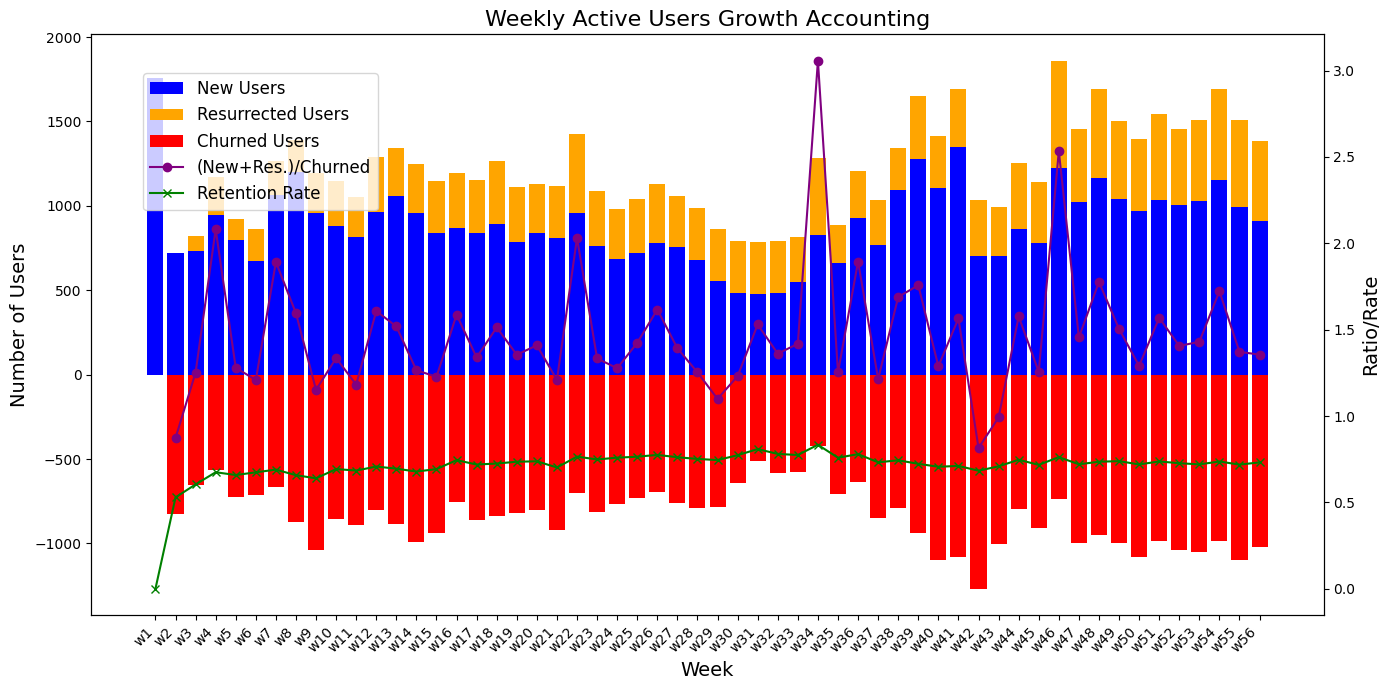

In [7]:
import pandas as pd
import matplotlib.pyplot as plt



# Reshape the dataframe from wide to long format
df_long = pd.melt(df, var_name='week', value_name='device_id')
df_long = df_long.dropna().reset_index(drop=True)

# Sort the dataframe by week
df_long['week'] = df_long['week'].apply(lambda x: int(x[1:]))  # Remove 'w' and convert to integer
df_long = df_long.sort_values(by='week').reset_index(drop=True)
df_long['week'] = 'w' + df_long['week'].astype(str)  # Add 'w' back to the week column

# Function to calculate weekly growth accounting metrics
def calculate_growth_metrics(df):
    metrics = {
        "week": [],
        "new_users": [],
        "resurrected_users": [],
        "churned_users": [],
        "retained_users": [],
        "quick_ratio": [],
        "retention_rate": []
    }

    previous_week_users = set()
    all_previous_users = set()

    for week in sorted(df['week'].unique(), key=lambda x: int(x[1:])):
        current_week_users = set(df[df['week'] == week]['device_id'])

        new_users = current_week_users - previous_week_users
        retained_users = current_week_users & previous_week_users
        resurrected_users = current_week_users - previous_week_users - new_users
        churned_users = previous_week_users - current_week_users

        # Corrected calculation for resurrected users
        resurrected_users = current_week_users & all_previous_users - previous_week_users

        metrics["week"].append(week)
        metrics["new_users"].append(len(new_users))
        metrics["resurrected_users"].append(len(resurrected_users))
        metrics["churned_users"].append(len(churned_users))
        metrics["retained_users"].append(len(retained_users))
        if len(churned_users) > 0:
            quick_ratio = (len(new_users) + len(resurrected_users)) / len(churned_users)
        else:
            quick_ratio = float('inf')
        metrics["quick_ratio"].append(quick_ratio)
        if previous_week_users:
            retention_rate = len(retained_users) / len(previous_week_users)
        else:
            retention_rate = 0
        metrics["retention_rate"].append(retention_rate)

        previous_week_users = current_week_users
        all_previous_users.update(current_week_users)

    return pd.DataFrame(metrics)

# Calculate metrics
metrics_df = calculate_growth_metrics(df_long)

# Save metrics to CSV
metrics_df.to_csv("weekly_growth_metrics.csv", index=False)

# Display metrics
print(metrics_df)

# Check for zero counts in metrics
print("Weeks with zero retained users:", metrics_df[metrics_df["retained_users"] == 0]["week"].tolist())
print("Weeks with zero churned users:", metrics_df[metrics_df["churned_users"] == 0]["week"].tolist())
print("Weeks with zero resurrected users:", metrics_df[metrics_df["resurrected_users"] == 0]["week"].tolist())

# Plot the metrics
fig, ax1 = plt.subplots(figsize=(14, 7))

# Stacked bar plot for new, resurrected, and churned users
p1 = ax1.bar(metrics_df["week"], metrics_df["new_users"], label="New Users", color='blue')
p2 = ax1.bar(metrics_df["week"], metrics_df["resurrected_users"], label="Resurrected Users", bottom=metrics_df["new_users"], color='orange')
p3 = ax1.bar(metrics_df["week"], -metrics_df["churned_users"], label="Churned Users", color='red')

# Set labels and title
ax1.set_xlabel("Week", fontsize=14)
ax1.set_ylabel("Number of Users", fontsize=14)
ax1.set_title("Weekly Active Users Growth Accounting", fontsize=16)

# Rotate x-axis labels for better readability
ax1.set_xticklabels(metrics_df["week"], rotation=45, ha="right")

# Create a twin axis to plot the quick ratio and retention rate
ax2 = ax1.twinx()
ax2.plot(metrics_df["week"], metrics_df["quick_ratio"], label="(New+Res.)/Churned", color='purple', marker='o')
ax2.plot(metrics_df["week"], metrics_df["retention_rate"], label="Retention Rate", color='green', marker='x')
ax2.set_ylabel("Ratio/Rate", fontsize=14)

# Add legends
fig.legend(loc="upper left", bbox_to_anchor=(0.1, 0.9), fontsize=12)

# Adjust layout for better spacing
plt.tight_layout()

# Show plot
plt.show()
